# Canadian Energy Production Analysis:

Data Source: Statistics Canada.  [Table  25-10-0015-01   Electric power generation, monthly generation by type of electricity](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510001501)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_source = 'data/25100015-eng/25100015.csv'
energy_data = pd.read_csv(data_source, low_memory=False)


drop_columns = ['UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
dropped_energy_data = energy_data.drop(drop_columns, axis=1)

# Replace spaces in columns with underscores.
dropped_energy_data.columns = dropped_energy_data.columns.str.replace(' ', '_')

## Create selection of total energy produced in Canada by type:

In [2]:
canada_energy_data = dropped_energy_data.loc[(dropped_energy_data.GEO == 'Canada') & 
                                             (dropped_energy_data.Class_of_electricity_producer == 'Total all classes of electricity producer')]

canada_energy_data.head()



,REF_DATE,GEO,DGUID,Class_of_electricity_producer,Type_of_electricity_generation,UOM,VALUE
0,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Total all types of electricity generation,Megawatt hours,59082501.0
1,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Hydraulic turbine,Megawatt hours,36647695.0
2,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Conventional steam turbine,Megawatt hours,11021441.0
3,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Nuclear steam turbine,Megawatt hours,8963878.0
4,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Internal combustion turbine,Megawatt hours,105643.0


## Visualize changes in energy production type over time

No handles with labels found to put in legend.


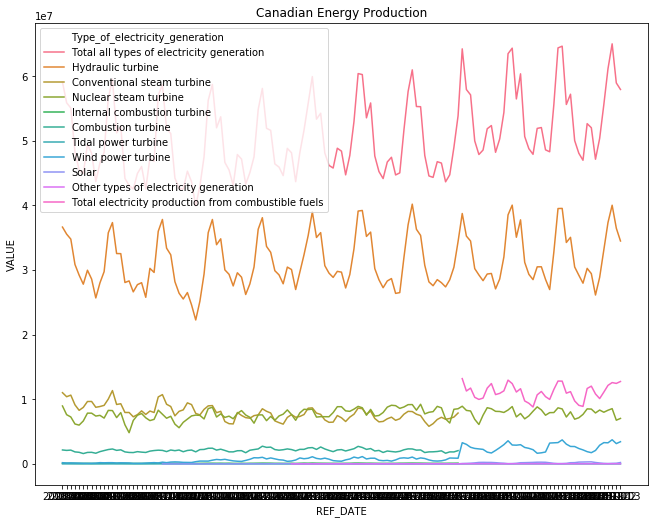

In [4]:
plt.figure(figsize=(11,8.5))
plt.legend()
plt.title('Canadian Energy Production')
plt.xlabel('Time')
plt.ylabel('Megawatt hours')

sns.lineplot(data=canada_energy_data, x='REF_DATE', y='VALUE', hue='Type_of_electricity_generation')
